# Dataset 2: Adidas Sales Dataset Modelling (ML Models)

## Import Necessary Library

In [27]:
# Core Libraries & Visualisation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.stats import randint, uniform, loguniform 

# Data Splitting & Scaling
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV, KFold
from sklearn.preprocessing import StandardScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor, VotingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# System & Warnings
import warnings
warnings.filterwarnings("ignore")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 100)

## Read the Preprocessed Adidas Sales Dataset

In [28]:
# Load the preprocessed Adidas Dataset
df = pd.read_csv('adidas_preprocessed.csv')

print("Dataset with all columns:")
display(df.head())

Dataset with all columns:


,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Year,Quarter,Month,Week,Day,Lag_1_Sales,Lag_7_Sales,Rolling_Mean_3,Rolling_Mean_10,Rolling_Std_3,Price_Change,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Method_In-store,Method_Online,Method_Outlet
0,0,1185732,2021-01-13,0,0,0,0,35.0,575,271250.0,108500.0,0.40,2021,1,1,2,13,93326.348787,93384.182594,93228.940187,93093.365676,81165.544752,0.0,0,0,0,1,0,1,0
1,0,1185732,2021-01-13,0,0,0,1,35.0,575,201250.0,70437.5,0.35,2021,1,1,2,13,271250.000000,93384.182594,93228.940187,93093.365676,81165.544752,0.0,0,0,0,1,0,1,0
2,0,1185732,2021-01-13,0,0,0,2,25.0,575,143750.0,57500.0,0.40,2021,1,1,2,13,201250.000000,93384.182594,93228.940187,93093.365676,81165.544752,-10.0,0,0,0,1,0,1,0
3,0,1185732,2021-01-13,0,0,0,3,30.0,425,127500.0,51000.0,0.40,2021,1,1,2,13,143750.000000,93384.182594,205416.666667,93093.365676,63852.042515,5.0,0,0,0,1,0,1,0
4,0,1185732,2021-01-13,0,0,0,4,45.0,475,213750.0,74812.5,0.35,2021,1,1,2,13,127500.000000,93384.182594,157500.000000,93093.365676,38750.000000,14.0,0,0,0,1,0,1,0


## Feature Selection and Data Splitting

In [29]:
features = ['Price_Change', 'Price per Unit', 'Lag_1_Sales',  'Lag_7_Sales', 'Rolling_Mean_3', 'Rolling_Mean_10', 
            'Rolling_Std_3', 'Season_Autumn', 'Season_Spring',  'Season_Summer', 'Method_In-store', 'Method_Online']

target = 'Total Sales'

# Final check before splitting
for col in features:
    if col not in df.columns:
        raise ValueError(f"Feature '{col}' not found in dataframe.")

X = df[features]
y = df[target]

print('Shape of X data: ', X.shape)
print('Shape of y data: ', y.shape)

Shape of X data:  (9648, 12)
Shape of y data:  (9648,)


In [30]:
X

,Price_Change,Price per Unit,Lag_1_Sales,Lag_7_Sales,Rolling_Mean_3,Rolling_Mean_10,Rolling_Std_3,Season_Autumn,Season_Spring,Season_Summer,Method_In-store,Method_Online
0,0.0,35.0,93326.348787,93384.182594,93228.940187,93093.365676,81165.544752,0,0,0,0,1
1,0.0,35.0,271250.000000,93384.182594,93228.940187,93093.365676,81165.544752,0,0,0,0,1
2,-10.0,25.0,201250.000000,93384.182594,93228.940187,93093.365676,81165.544752,0,0,0,0,1
3,5.0,30.0,143750.000000,93384.182594,205416.666667,93093.365676,63852.042515,0,0,0,0,1
4,14.0,45.0,127500.000000,93384.182594,157500.000000,93093.365676,38750.000000,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9643,5.0,56.0,11475.000000,11468.000000,11457.333333,133592.200000,1872.562505,0,0,0,0,0
9644,-8.0,48.0,13048.000000,15696.000000,12614.666667,96397.000000,996.374595,0,0,0,0,0
9645,5.0,53.0,9264.000000,11055.000000,11262.333333,59323.400000,1900.943012,0,0,0,0,0
9646,1.0,54.0,8745.000000,9581.000000,10352.333333,11322.900000,2348.894279,0,0,0,0,0


In [31]:
y

0       271250.0
1       201250.0
2       143750.0
3       127500.0
4       213750.0
          ...   
9643     13048.0
9644      9264.0
9645      8745.0
9646      8478.0
9647     11055.0
Name: Total Sales, Length: 9648, dtype: float64

## Train-Test Split

In [32]:
train_size = 0.8
split_idx = int(len(df) * train_size)

X_train = X.iloc[:split_idx].reset_index(drop=True)
X_test  = X.iloc[split_idx:].reset_index(drop=True)
y_train = y.iloc[:split_idx].reset_index(drop=True)
y_test  = y.iloc[split_idx:].reset_index(drop=True)

print("\nTrain shape:", X_train.shape, y_train.shape)
print("Test shape :", X_test.shape, y_test.shape)

# Save test index/time axis for plotting
if 'Invoice Date' in df.columns:
    test_dates = df['Invoice Date'].iloc[split_idx:].reset_index(drop=True)
else:
    test_dates = pd.RangeIndex(start=split_idx, stop=len(df))


Train shape: (7718, 12) (7718,)
Test shape : (1930, 12) (1930,)


## Scaling

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define X_train_boost and X_test_boost (original features for tree models)
X_train_boost = X_train.copy()
X_test_boost = X_test.copy()

## TimeSeriesSplit for CV

In [34]:
tscv = TimeSeriesSplit(n_splits=5)

## Define Base Models

In [35]:
# Model Initialization
ridge = Ridge(random_state=42)
forest = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(enable_categorical=True, random_state=42, verbosity=0)
lgbm = LGBMRegressor(random_state=42, verbose=-1)
gbm = GradientBoostingRegressor(random_state=42)

## Hyperparameter Tuning

In [36]:
# Parameter Grids
param_grid_ridge = {'alpha': loguniform(1e-2, 10)}

param_grid_forest = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10)
}

param_grid_xgb = {
    'n_estimators': randint(100, 200),
    'learning_rate': loguniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3)
}

param_grid_lgbm = {
    'n_estimators': randint(100, 300),
    'learning_rate': loguniform(0.01, 0.1),
    'num_leaves': randint(31, 128),
    'min_child_samples': randint(5, 30),
    'reg_alpha': loguniform(1e-3, 0.5),
    'reg_lambda': loguniform(1e-3, 0.5)
}

param_grid_gbm = { 
    'n_estimators': randint(100, 200),
    'learning_rate': loguniform(0.01, 0.1),
    'max_depth': randint(3, 8),
    'subsample': uniform(0.7, 0.3)
}

# Randomized Hyperparameter Search Execution
searches = {
    'Ridge': RandomizedSearchCV(ridge, param_grid_ridge, cv=tscv, n_iter=25, scoring='neg_root_mean_squared_error', random_state=42, n_jobs=-1, verbose=0),
    'Random Forest': RandomizedSearchCV(forest, param_grid_forest, cv=tscv, n_iter=25, scoring='neg_root_mean_squared_error', random_state=42, n_jobs=-1, verbose=0),
    'XGBoost': RandomizedSearchCV(xgb, param_grid_xgb, cv=tscv, n_iter=25, scoring='neg_root_mean_squared_error', random_state=42, n_jobs=-1, verbose=0),
    'LightGBM': RandomizedSearchCV(lgbm, param_grid_lgbm, cv=tscv, n_iter=25, scoring='neg_root_mean_squared_error', random_state=42, n_jobs=-1, verbose=0), 
    'GBM': RandomizedSearchCV(gbm, param_grid_gbm, cv=tscv, n_iter=25, scoring='neg_root_mean_squared_error', random_state=42, n_jobs=-1)
}

best_estimators = {}
print("Starting Hyperparameter Tuning...")
for name, search in searches.items():
    print(f"Tuning {name}...")
    if name in ['Ridge']: 
        # Linear models typically benefit from scaled data
        search.fit(X_train_scaled, y_train)
    else:
        # Tree-based/Boosting models use original features
        search.fit(X_train_boost, y_train)
    
    # Store the best estimator
    best_estimators[name] = search.best_estimator_
    
    # Quick check metrics for printout
    if name in ['Ridge']:
        y_pred = search.best_estimator_.predict(X_test_scaled)
    else:
        y_pred = search.best_estimator_.predict(X_test_boost)

    print(f"Best Params for {name}: {search.best_params_}")
    print("-" * 50)

# Assign best estimators to variables used in subsequent blocks
ridge_best = best_estimators['Ridge']
rf_best = best_estimators['Random Forest']
xgb_best = best_estimators['XGBoost']
lgbm_best = best_estimators['LightGBM']
gbm_best = best_estimators['GBM']
lr = LinearRegression() # Base LR model

Starting Hyperparameter Tuning...
Tuning Ridge...
Best Params for Ridge: {'alpha': 8.123245085588687}
--------------------------------------------------
Tuning Random Forest...
Best Params for Random Forest: {'max_depth': 22, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 289}
--------------------------------------------------
Tuning XGBoost...
Best Params for XGBoost: {'colsample_bytree': 0.7271819303598462, 'learning_rate': 0.06375859628711789, 'max_depth': 6, 'n_estimators': 154, 'subsample': 0.9949692657420364}
--------------------------------------------------
Tuning LightGBM...
Best Params for LightGBM: {'learning_rate': 0.03464911387927851, 'min_child_samples': 28, 'n_estimators': 253, 'num_leaves': 119, 'reg_alpha': 0.005731044951044763, 'reg_lambda': 0.029155497059176992}
--------------------------------------------------
Tuning GBM...
Best Params for GBM: {'learning_rate': 0.06954802068126899, 'max_depth': 6, 'n_estimators': 133, 'subsample': 0.818545070800544

## Train/Fit Final Models

In [37]:
# Linear base model
lr.fit(X_train_scaled, y_train)
print("Linear Regression is fitted on scaled data.")

# Tuned models are already fitted during RandomizedSearchCV.
print("All individual models are now trained and ready for prediction/ensembling.")

Linear Regression is fitted on scaled data.
All individual models are now trained and ready for prediction/ensembling.


## Ensemble Models

In [38]:
# Setup kfold for StackingCV
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Ensemble 1: RF + XGBoost + Linear Regression (RF-XGBoost-LR (Stacking))
print("\nTraining RF-XGBoost-LR (Stacking) Ensemble Model...")

stack_estimators = [
    ('rf', rf_best), 
    ('xgb', xgb_best)
]

stack_model = StackingRegressor(
    estimators=stack_estimators, 
    final_estimator=lr, # Use the base Linear Regression model as the meta-learner
    cv=kfold, 
    n_jobs=-1
)

# Note: StackingRegressor handles feature selection internally. Tree models (RF, XGB) use original features, 
# and the Linear Regression meta-learner will automatically be fed the cross-validated predictions (meta-features).

stack_model.fit(X_train_boost, y_train)
print("RF-XGBoost-LR (Stacking) Ensemble Model trained.")

# Ensemble 2: RF + LightGBM (RF + LightGBM (Voting))
print("\nTraining RF-LightGBM (Voting) Ensemble Model...")
voting_rf_lgbm = VotingRegressor(
    estimators=[('rf', rf_best), ('lgbm', lgbm_best)],
    n_jobs=-1
)

# Note: VotingRegressor performs simple averaging of the base model predictions.
# Both Random Forest and LightGBM operate on the original feature space (X_train_boost), providing a robust 
# combined forecast by balancing bagging and boosting strengths.

voting_rf_lgbm.fit(X_train_boost, y_train)
print("RF-LightGBM (Voting) Ensemble Model trained.")


Training RF-XGBoost-LR (Stacking) Ensemble Model...
RF-XGBoost-LR (Stacking) Ensemble Model trained.

Training RF-LightGBM (Voting) Ensemble Model...
RF-LightGBM (Voting) Ensemble Model trained.


## Predictions (Test)

In [39]:
# Linear models predictions
y_pred_lr_test = lr.predict(X_test_scaled)
y_pred_ridge_test = ridge_best.predict(X_test_scaled)

# Tree/boosting predictions
y_pred_rf_test = rf_best.predict(X_test_boost)
y_pred_xgb_test = xgb_best.predict(X_test_boost)
y_pred_lgbm_test = lgbm_best.predict(X_test_boost)
y_pred_gbm_test = gbm_best.predict(X_test_boost)

# Ensemble Predictions (Stacking and Voting)
y_pred_stack_test = stack_model.predict(X_test_boost)
y_pred_vote_test = voting_rf_lgbm.predict(X_test_boost)

print("All predictions are generated for the test set.")

All predictions are generated for the test set.


## Evaluation Metrics Functions

In [40]:
def safe_mape(y_true, y_pred):
    y_true_arr = np.array(y_true)
    eps = 1e-8
    denom = np.where(np.abs(y_true_arr) < eps, eps, np.abs(y_true_arr))
    return np.mean(np.abs((y_true_arr - np.array(y_pred)) / denom)) * 100

def eval_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

def print_metrics(prefix, metrics):
    print(f"\n--- {prefix} ---")
    print(f"MSE: {metrics['MSE']:,.2f}")
    print(f"RMSE: {metrics['RMSE']:,.2f}")
    print(f"MAE: {metrics['MAE']:,.2f}")
    print(f"R2: {metrics['R2']:.4f}")

## Evaluate and Collect Results for Test Set

In [41]:
model_predictions_test = {
    # Standalone Models
    'Linear Regression': y_pred_lr_test,
    'Ridge Regression': y_pred_ridge_test,
    'Random Forest': y_pred_rf_test,
    'GBM': y_pred_gbm_test,
    'XGBoost': y_pred_xgb_test,
    'LightGBM': y_pred_lgbm_test,
    
    # Ensemble Models (Stacking and Voting)
    'RF-XGBoost-LR (Stacking)': y_pred_stack_test,
    'RF-LightGBM (Voting)': y_pred_vote_test
}

results = {}
for name, preds in model_predictions_test.items():
    metrics = eval_metrics(y_test, preds)
    results[name] = metrics
    print_metrics(name, metrics)

# Present results in a DataFrame
results_df = pd.DataFrame(results).T.reset_index().rename(columns={'index':'Model'})
print("\n--- Final Model Performance Summary (Test Set) ---")

# Sorting by RMSE puts the best model at the top
display(results_df.sort_values('RMSE'))


--- Linear Regression ---
MSE: 5,645,651,163.08
RMSE: 75,137.55
MAE: 59,395.02
R2: 0.5142

--- Ridge Regression ---
MSE: 5,644,475,908.62
RMSE: 75,129.73
MAE: 59,388.72
R2: 0.5143

--- Random Forest ---
MSE: 1,575,925,798.64
RMSE: 39,697.93
MAE: 22,988.14
R2: 0.8644

--- GBM ---
MSE: 1,610,961,155.96
RMSE: 40,136.78
MAE: 23,835.52
R2: 0.8614

--- XGBoost ---
MSE: 1,524,246,106.76
RMSE: 39,041.59
MAE: 24,113.88
R2: 0.8688

--- LightGBM ---
MSE: 1,471,862,436.49
RMSE: 38,364.86
MAE: 22,816.84
R2: 0.8733

--- RF-XGBoost-LR (Stacking) ---
MSE: 1,404,963,861.90
RMSE: 37,482.85
MAE: 23,056.70
R2: 0.8791

--- RF-LightGBM (Voting) ---
MSE: 1,426,363,827.66
RMSE: 37,767.23
MAE: 21,909.53
R2: 0.8773

--- Final Model Performance Summary (Test Set) ---


,Model,MSE,RMSE,MAE,R2
6,RF-XGBoost-LR (Stacking),1.404964e+09,37482.847569,23056.695362,0.879096
7,RF-LightGBM (Voting),1.426364e+09,37767.232195,21909.530838,0.877254
5,LightGBM,1.471862e+09,38364.859396,22816.835780,0.873339
4,XGBoost,1.524246e+09,39041.594572,24113.876249,0.868831
2,Random Forest,1.575926e+09,39697.931919,22988.142238,0.864384
3,GBM,1.610961e+09,40136.780588,23835.517442,0.861369
1,Ridge Regression,5.644476e+09,75129.727196,59388.723065,0.514265
0,Linear Regression,5.645651e+09,75137.548290,59395.019457,0.514164


## Comparing Results Between Train Set and Test Set

In [42]:
# 1. Dictionary to store training predictions
model_predictions_train = {
    'Linear Regression': lr.predict(X_train_scaled),
    'Ridge Regression': ridge_best.predict(X_train_scaled),
    'Random Forest': rf_best.predict(X_train_boost),
    'GBM': gbm_best.predict(X_train_boost),
    'XGBoost': xgb_best.predict(X_train_boost),
    'LightGBM': lgbm_best.predict(X_train_boost),
    
    # The 2 Ensemble Models
    'RF-XGBoost-LR (Stacking)': stack_model.predict(X_train_boost),
    'RF-LightGBM (Voting)': voting_rf_lgbm.predict(X_train_boost)
}

# 2. Collect Training Metrics using your eval_metrics function
train_results = {}
for name, preds in model_predictions_train.items():
    metrics = eval_metrics(y_train, preds)
    train_results[name] = metrics

# 3. Create DataFrames
train_df = pd.DataFrame(train_results).T.reset_index().rename(columns={'index':'Model'})
train_df['Set'] = 'Train'

test_df = results_df.copy()
test_df['Set'] = 'Test'

# 4. Merge and Pivot for side-by-side comparison
comparison_df = pd.concat([train_df, test_df], axis=0)
final_comparison = comparison_df.pivot(index='Model', columns='Set', values=['MSE', 'RMSE', 'MAE', 'R2'])

# 5. Organize metric columns
metric_order = ['MSE', 'RMSE', 'MAE', 'R2']
final_comparison = final_comparison.reindex(columns=metric_order, level=0)
final_comparison = final_comparison.sort_values(('R2', 'Test'), ascending=False)

# 6. Display the clean table
print("--- Comprehensive Model Performance: Train vs. Test Set ---")
display(final_comparison)

--- Comprehensive Model Performance: Train vs. Test Set ---


MSE                        RMSE                         MAE                      R2          
Set                               Test         Train          Test         Train          Test         Train      Test     Train
Model                                                                                                                           
RF-XGBoost-LR (Stacking)  1.404964e+09  8.756711e+08  37482.847569  29591.741148  23056.695362  17899.079663  0.879096  0.923550
RF-LightGBM (Voting)      1.426364e+09  5.124556e+08  37767.232195  22637.482800  21909.530838  12586.106029  0.877254  0.955260
LightGBM                  1.471862e+09  5.459836e+08  38364.859396  23366.291182  22816.835780  14113.495877  0.873339  0.952333
XGBoost                   1.524246e+09  1.133142e+09  39041.594572  33662.171507  24113.876249  20237.729156  0.868831  0.901071
Random Forest             1.575926e+09  5.577791e+08  39697.931919  23617.347214  22988.142238  12457.747254  0.864384  0.951303
GBM                       1.610961e+09  9.947262e+08  40136.780588  31539.279805  23835.517442  19118.255405  0.861369  0.913155
Ridge Regression          5.644476e+09  6.405583e+09  75129.727196  80034.884182  59388.723065  62460.619696  0.514265  0.440761
Linear Regression         5.645651e+09  6.405581e+09  75137.548290  80034.870544  59395.019457  62460.213698  0.514164  0.440761

## Visual Evaluation Functions

In [43]:
def plot_residuals(y_true, y_pred, title=None):
    residuals = np.array(y_true) - np.array(y_pred)
    plt.figure(figsize=(7,4))
    sns.histplot(residuals, bins=50, kde=True)
    plt.title(f"{title} — Residuals Distribution" if title else "Residuals Distribution")
    plt.xlabel("Residual (Actual - Predicted)")
    plt.show()

def plot_actual_vs_pred(y_true, y_pred, title=None):
    plt.figure(figsize=(6,6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    minv = np.min([y_true.min(), np.array(y_pred).min()])
    maxv = np.max([y_true.max(), np.array(y_pred).max()])
    plt.plot([minv, maxv], [minv, maxv], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(title if title else "Actual vs Predicted")
    plt.show()

import matplotlib.dates as mdates

def plot_time_series_compare(dates, y_true, y_pred, title=None, max_points=400):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    if len(y_true) > max_points:
        idx = np.arange(len(y_true)-max_points, len(y_true))
        # Ensure dates are converted to pandas datetime if they aren't already
        plot_dates = pd.to_datetime(np.array(dates)[idx])
        y_true_plot = y_true[idx]
        y_pred_plot = y_pred[idx]
    else:
        plot_dates = pd.to_datetime(dates)
        y_true_plot = y_true
        y_pred_plot = y_pred

    plt.figure(figsize=(14,6))
    plt.plot(plot_dates, y_true_plot, label='Actual Sales', color='#1f77b4', linewidth=1.5, alpha=0.9)
    plt.plot(plot_dates, y_pred_plot, label='Predicted Sales', color='#ff7f0e', linewidth=1.5, linestyle='--', alpha=0.9)
    
    # Improve date formatting on X-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    plt.gcf().autofmt_xdate() # Rotates dates for readability
    
    plt.title(title if title else "Actual vs Predicted Over Time", fontsize=14)
    plt.xlabel("Invoice Date", fontsize=12)
    plt.ylabel("Total Sales", fontsize=12)
    plt.legend(loc='upper left')
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.show()

## Visuals for All Models (Sorted by RMSE: Best to Worst)


Generating visuals for all 8 models, ranked from Best to Worst RMSE...

RANKED MODEL: RF-XGBoost-LR (Stacking)

--- RF-XGBoost-LR (Stacking) ---
MSE: 1,404,963,861.90
RMSE: 37,482.85
MAE: 23,056.70
R2: 0.8791


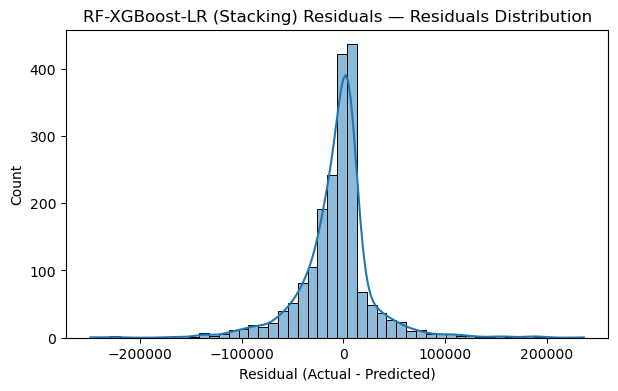

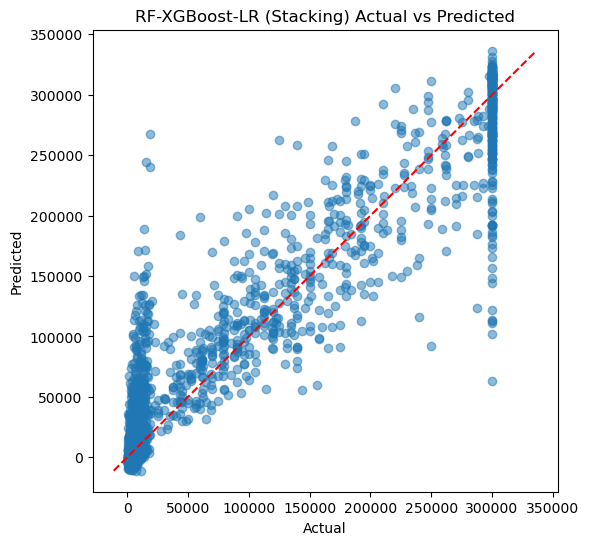

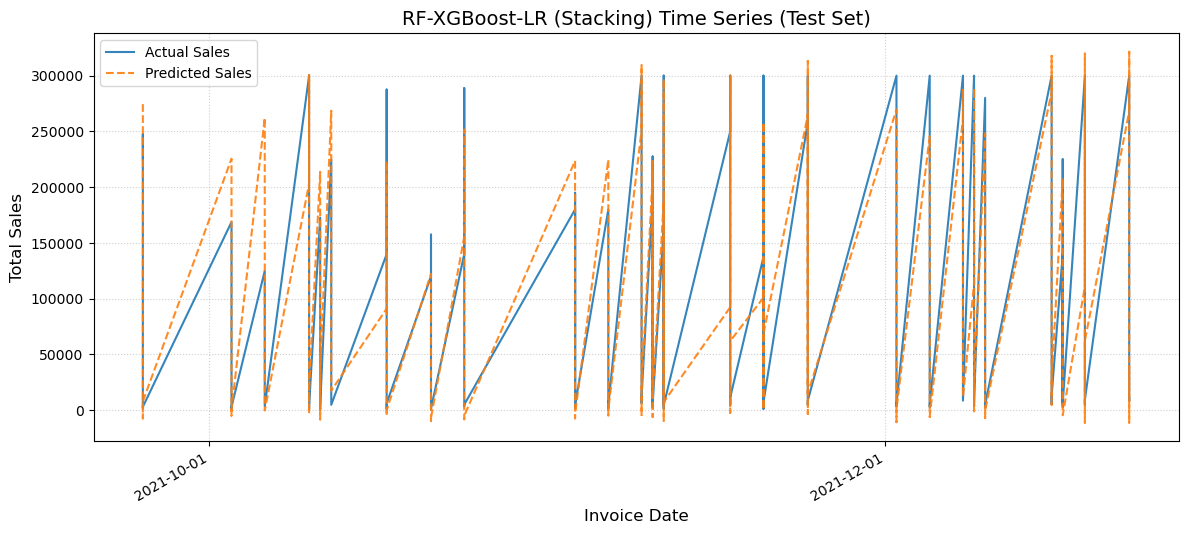


RANKED MODEL: RF-LightGBM (Voting)

--- RF-LightGBM (Voting) ---
MSE: 1,426,363,827.66
RMSE: 37,767.23
MAE: 21,909.53
R2: 0.8773


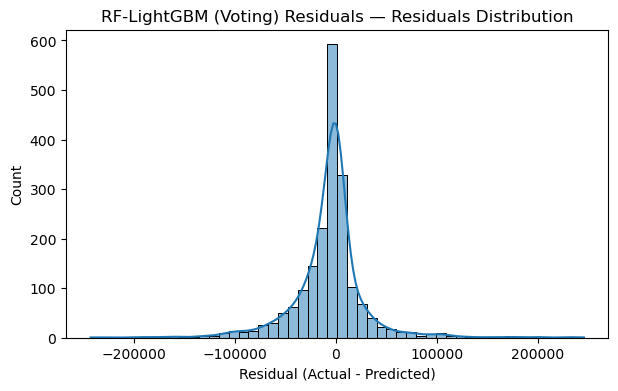

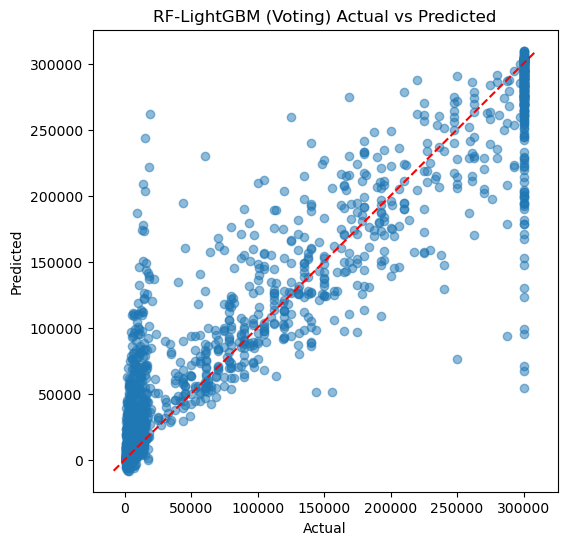

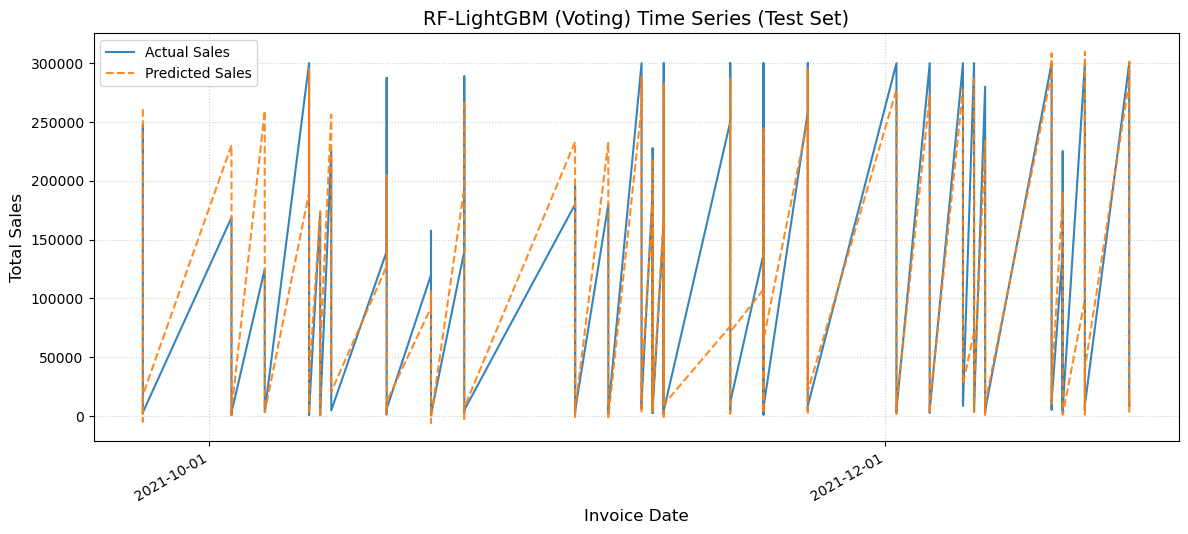


RANKED MODEL: LightGBM

--- LightGBM ---
MSE: 1,471,862,436.49
RMSE: 38,364.86
MAE: 22,816.84
R2: 0.8733


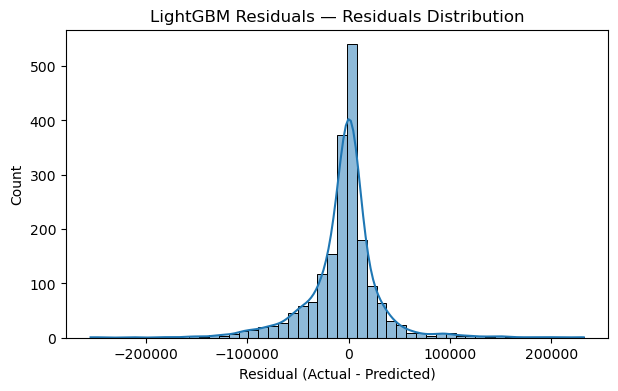

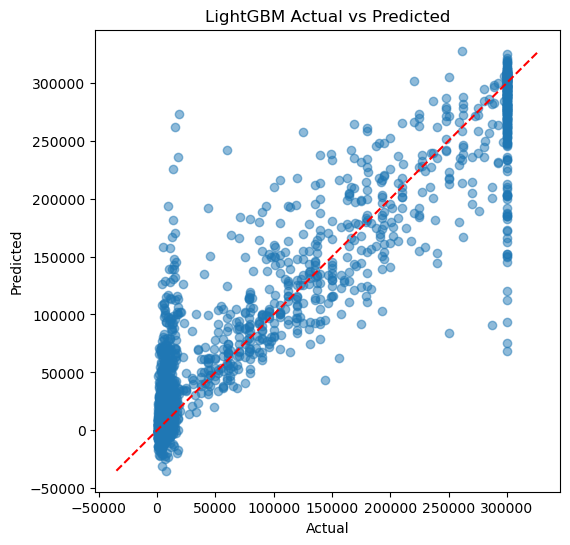

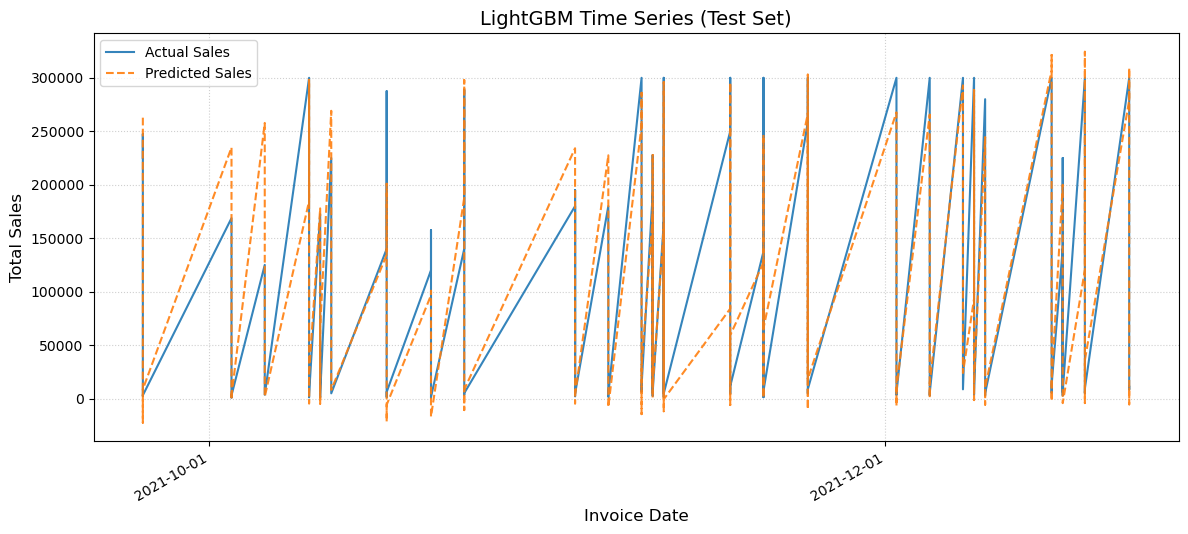


RANKED MODEL: XGBoost

--- XGBoost ---
MSE: 1,524,246,106.76
RMSE: 39,041.59
MAE: 24,113.88
R2: 0.8688


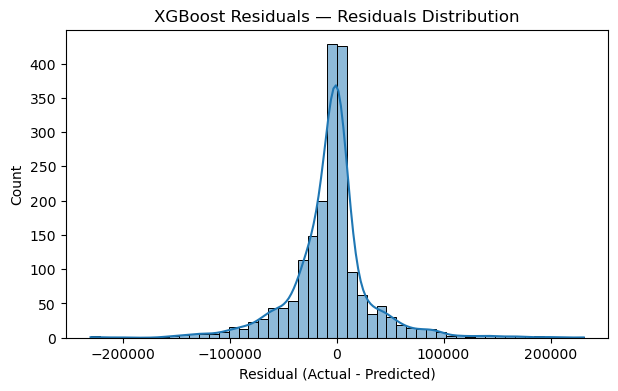

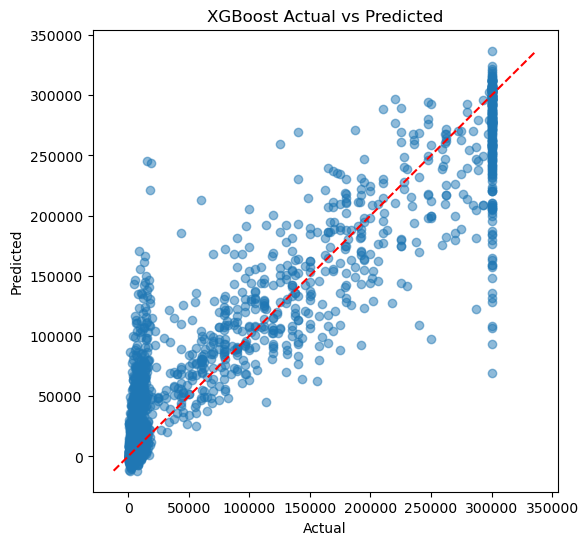

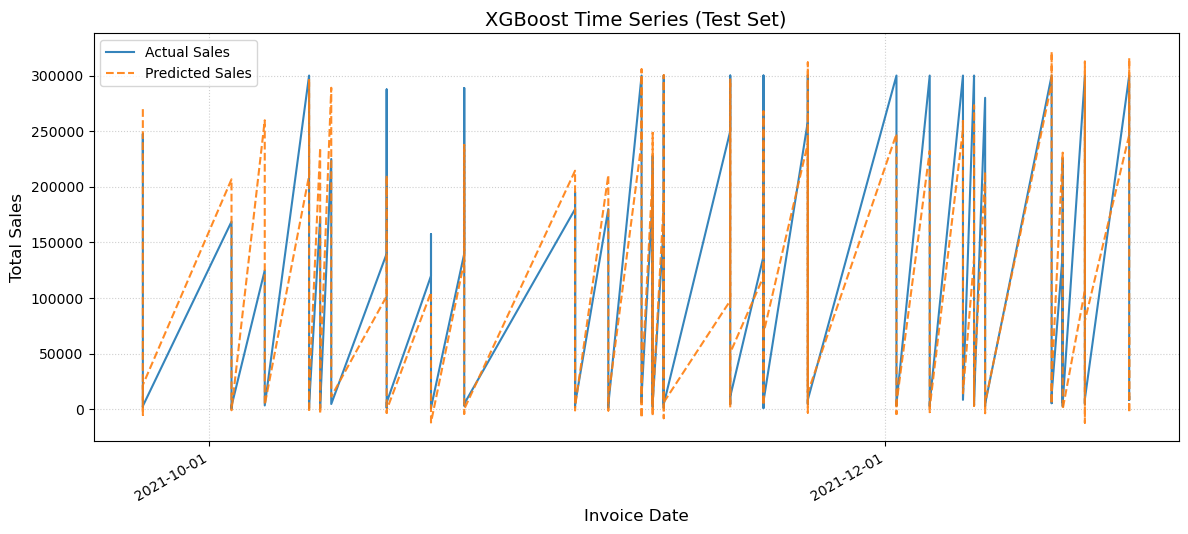


RANKED MODEL: Random Forest

--- Random Forest ---
MSE: 1,575,925,798.64
RMSE: 39,697.93
MAE: 22,988.14
R2: 0.8644


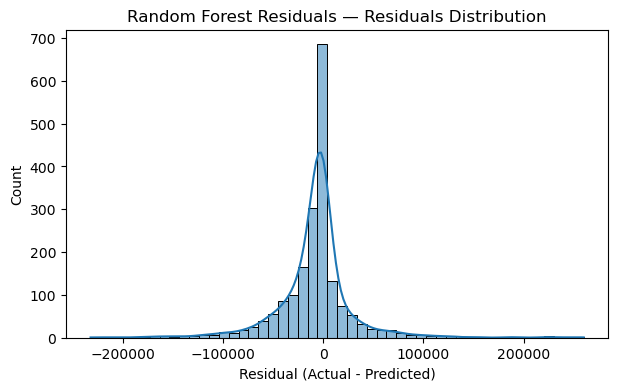

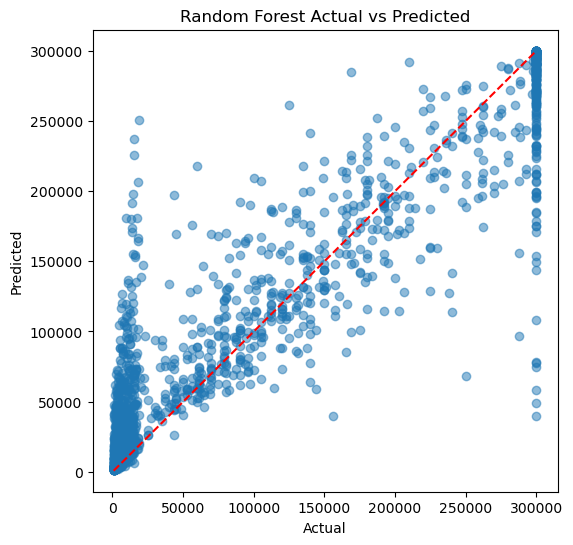

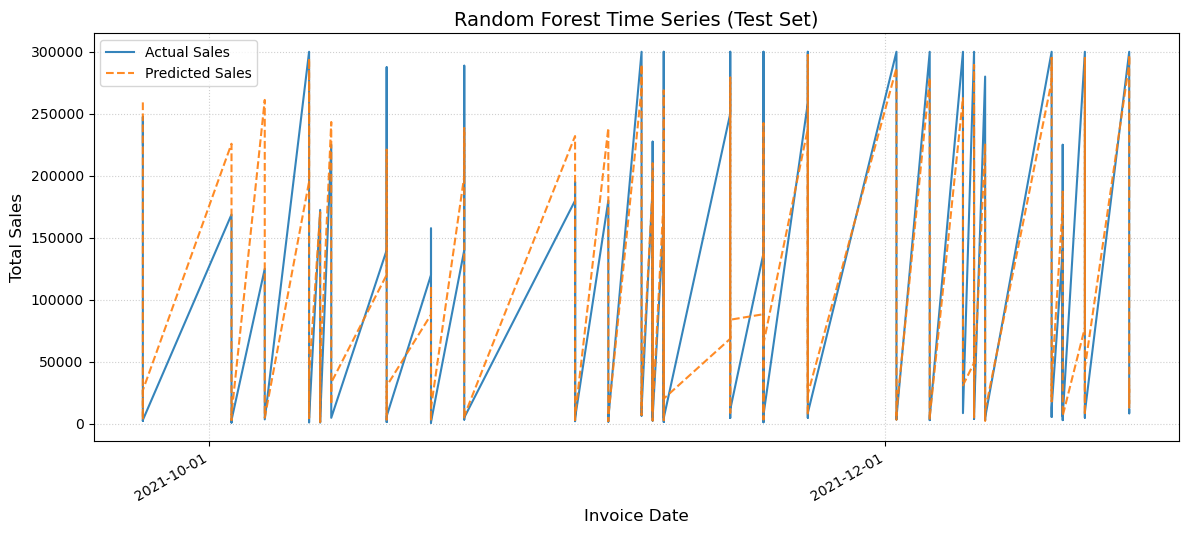


RANKED MODEL: GBM

--- GBM ---
MSE: 1,610,961,155.96
RMSE: 40,136.78
MAE: 23,835.52
R2: 0.8614


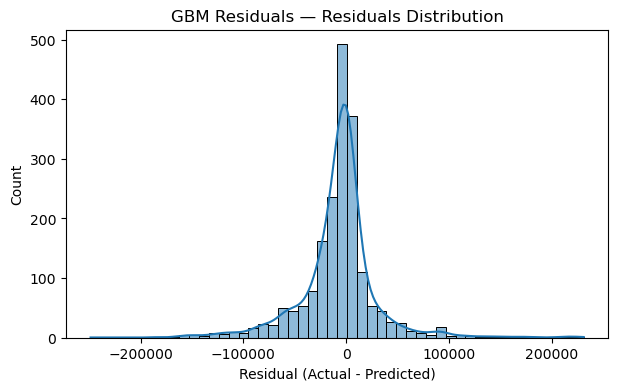

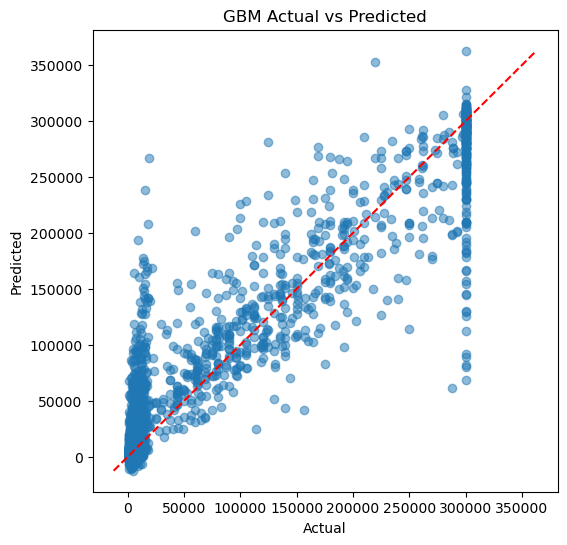

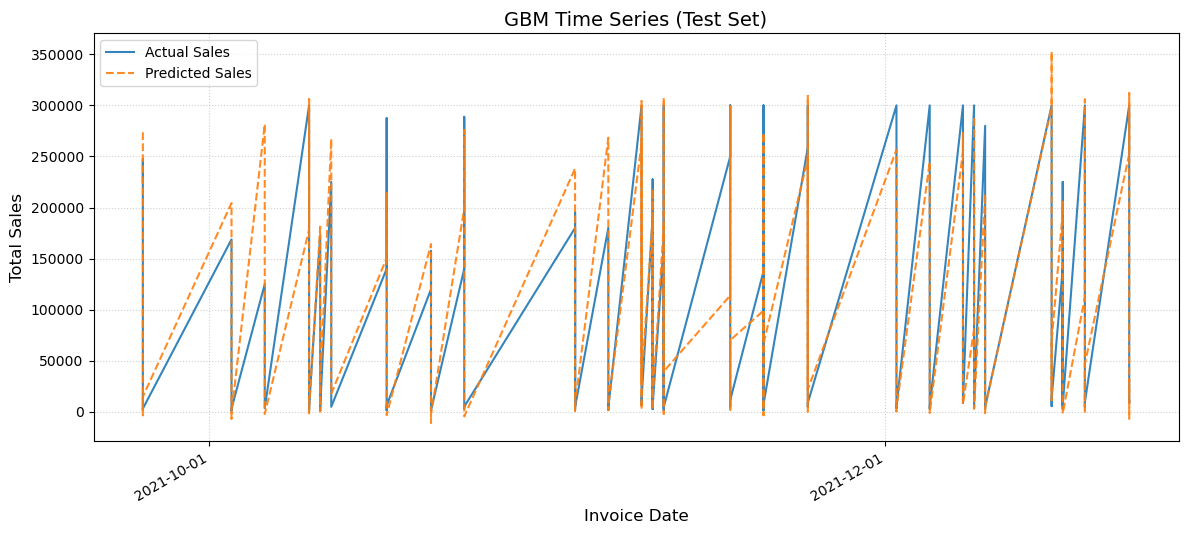


RANKED MODEL: Ridge Regression

--- Ridge Regression ---
MSE: 5,644,475,908.62
RMSE: 75,129.73
MAE: 59,388.72
R2: 0.5143


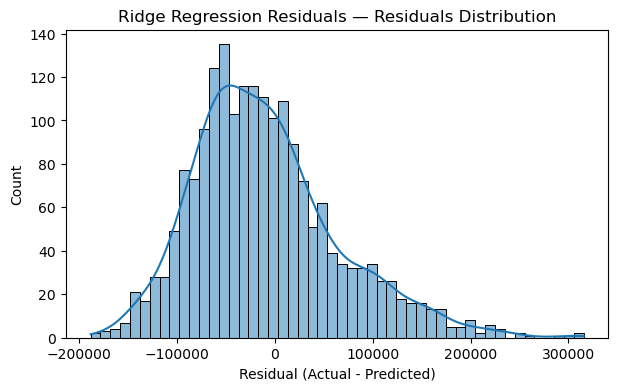

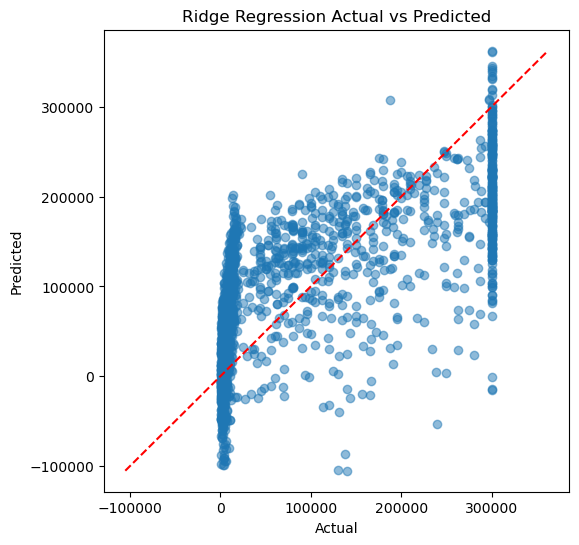

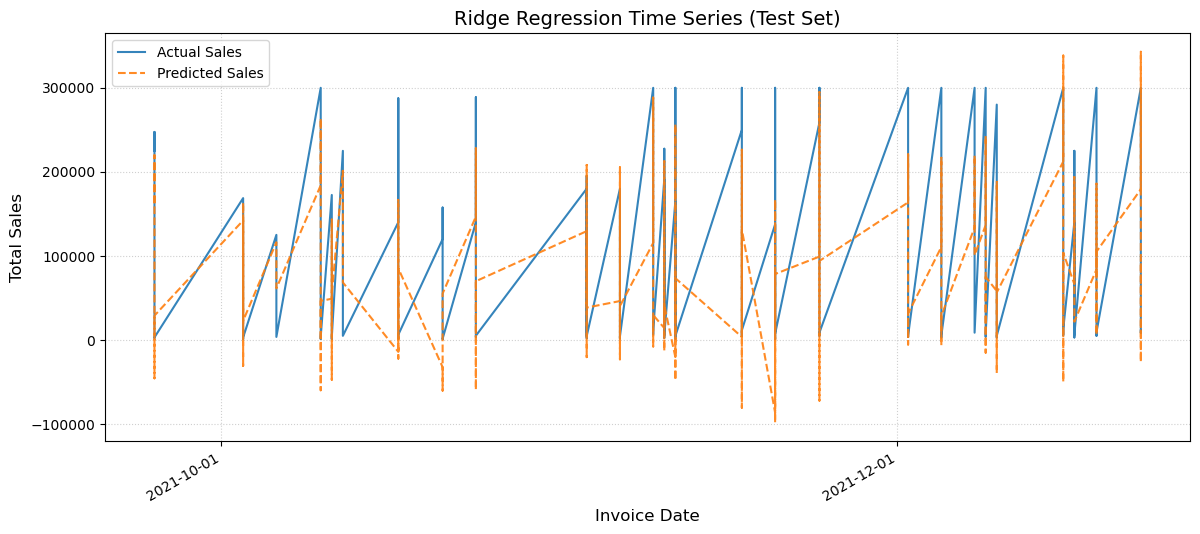


RANKED MODEL: Linear Regression

--- Linear Regression ---
MSE: 5,645,651,163.08
RMSE: 75,137.55
MAE: 59,395.02
R2: 0.5142


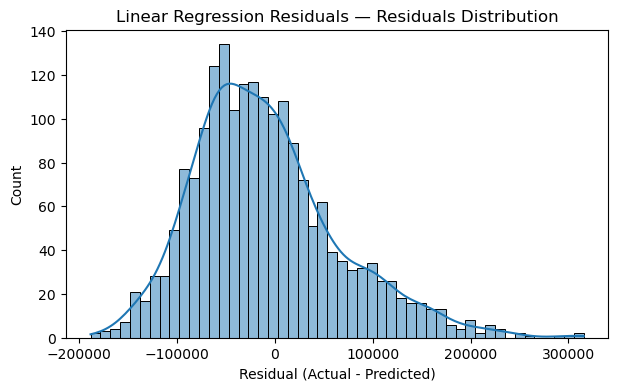

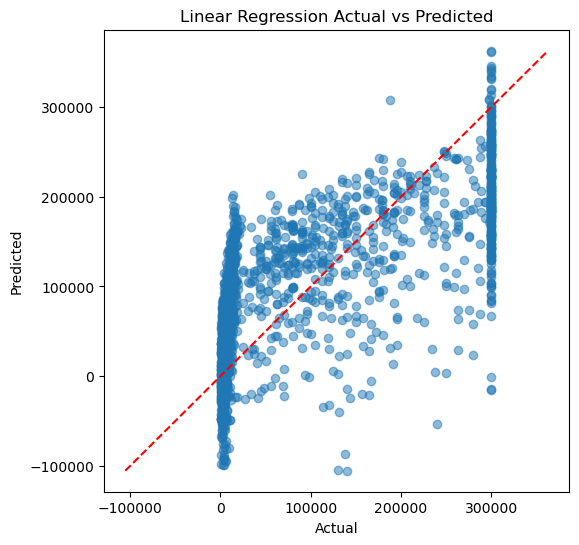

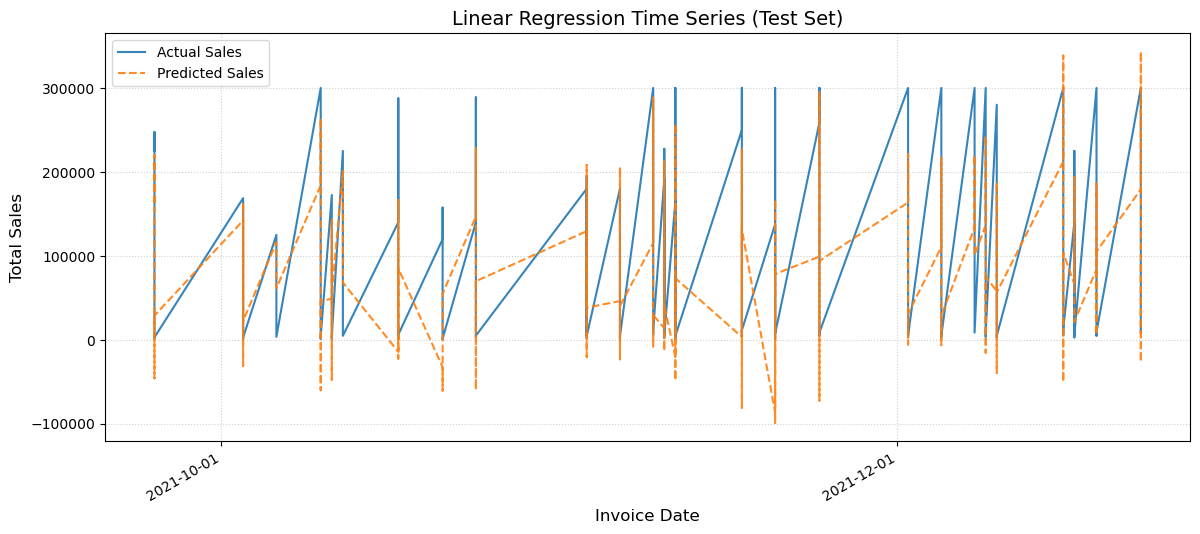

In [44]:
# 1. Get the model names sorted by RMSE from your results dataframe
sorted_all_models = results_df.sort_values('RMSE')['Model'].tolist()
print(f"\nGenerating visuals for all {len(sorted_all_models)} models, ranked from Best to Worst RMSE...")

# 2. Loop through the sorted list
for model_name in sorted_all_models:
    # Retrieve predictions from your dictionary using the sorted name
    preds = model_predictions_test[model_name]
    
    print(f"\n" + "="*60)
    print(f"RANKED MODEL: {model_name}")
    print("="*60)
    
    # 1. Performance Metrics (Detailed breakdown)
    metrics = eval_metrics(y_test, preds)
    print_metrics(model_name, metrics)
    
    # 2. Residual Plot (Shows if errors are unbiased/normally distributed)
    plot_residuals(y_test, preds, title=f"{model_name} Residuals")
    
    # 3. Actual vs Predicted Scatter (Shows the strength of correlation)
    plot_actual_vs_pred(y_test, preds, title=f"{model_name} Actual vs Predicted")
    
    # 4. Time Series Plot (Shows how well the model tracks holiday peaks)
    plot_time_series_compare(test_dates, y_test.values, preds, title=f"{model_name} Time Series (Test Set)")

## Feature Importance Plot (Random Forest)

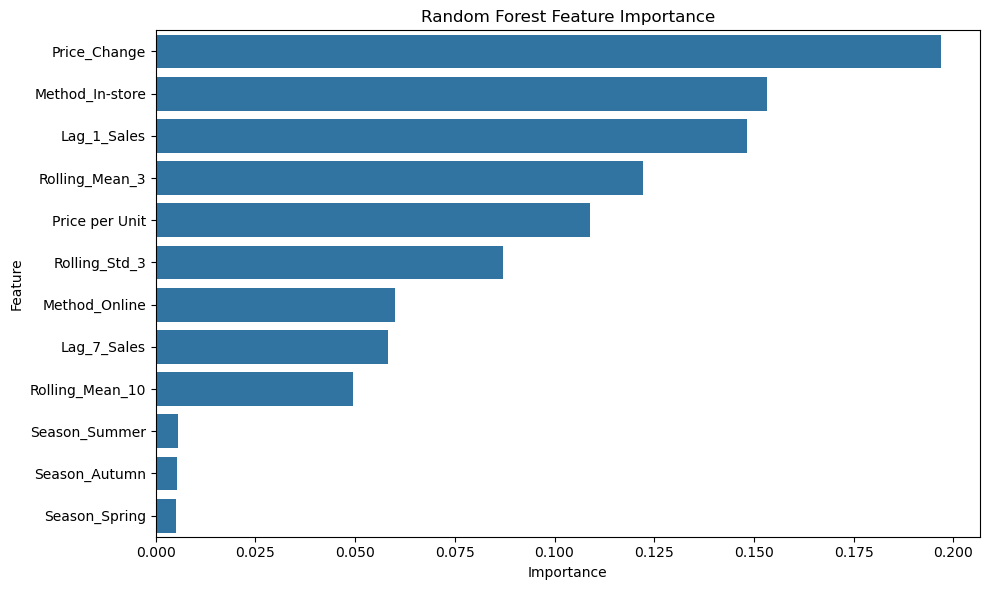

In [45]:
rf_importances = rf_best.feature_importances_

# Create the DataFrame
fi_df = pd.DataFrame({'Feature': features, 'Importance': rf_importances}).sort_values('Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=fi_df)
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

## Feature Importance Plot (XGBoost)

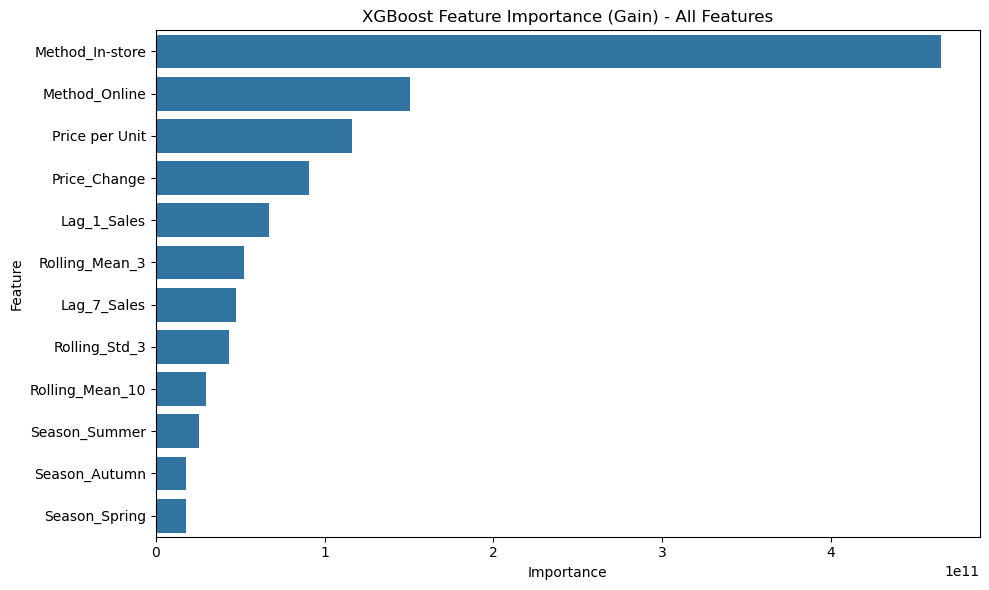

In [46]:
# XGBoost Feature Importance (Gain) including all features
xgb_importances_raw = xgb_best.get_booster().get_score(importance_type='gain')

# Ensure all 14 features are included (assign 0 importance if not used)
xgb_importances = {f: xgb_importances_raw.get(f, 0) for f in features}

# Convert to DataFrame
xgb_fi_df = pd.DataFrame({
    'Feature': list(xgb_importances.keys()),
    'Importance': list(xgb_importances.values())
}).sort_values('Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_fi_df)
plt.title("XGBoost Feature Importance (Gain) - All Features")
plt.tight_layout()
plt.show()

## Feature Importance Plot (LightGBM)

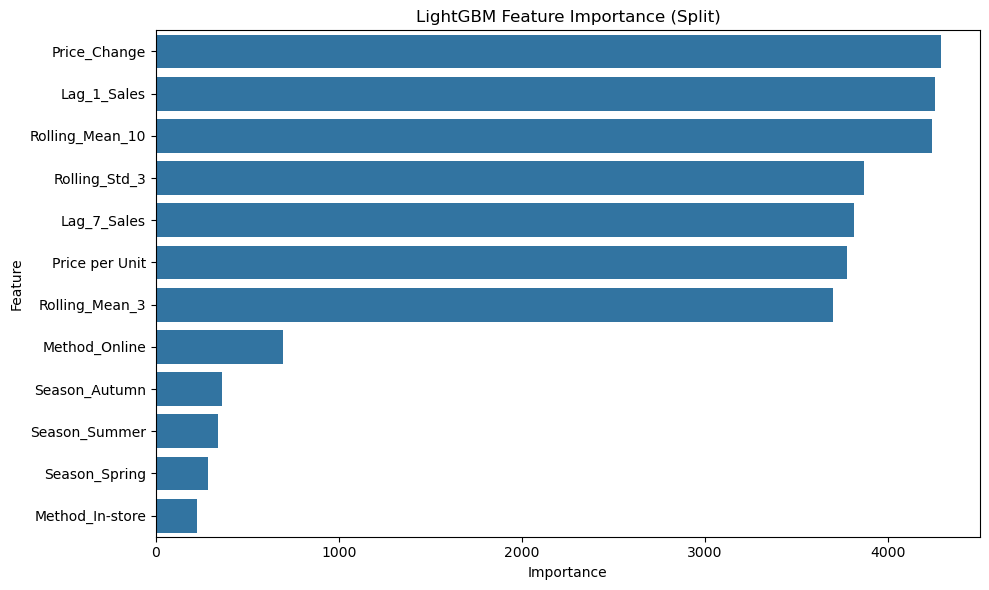

In [47]:
# LightGBM Feature Importance (Split)
# Use the fitted LightGBM model (lgbm_best) for feature importance
lgb_importances = lgbm_best.feature_importances_

# Create a DataFrame to organize features and their importance
lgb_fi_df = pd.DataFrame({
    'Feature': features,
    'Importance': lgb_importances
}).sort_values('Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=lgb_fi_df)
plt.title("LightGBM Feature Importance (Split)")
plt.tight_layout()
plt.show()

## Feature Importance Plot (GBM)

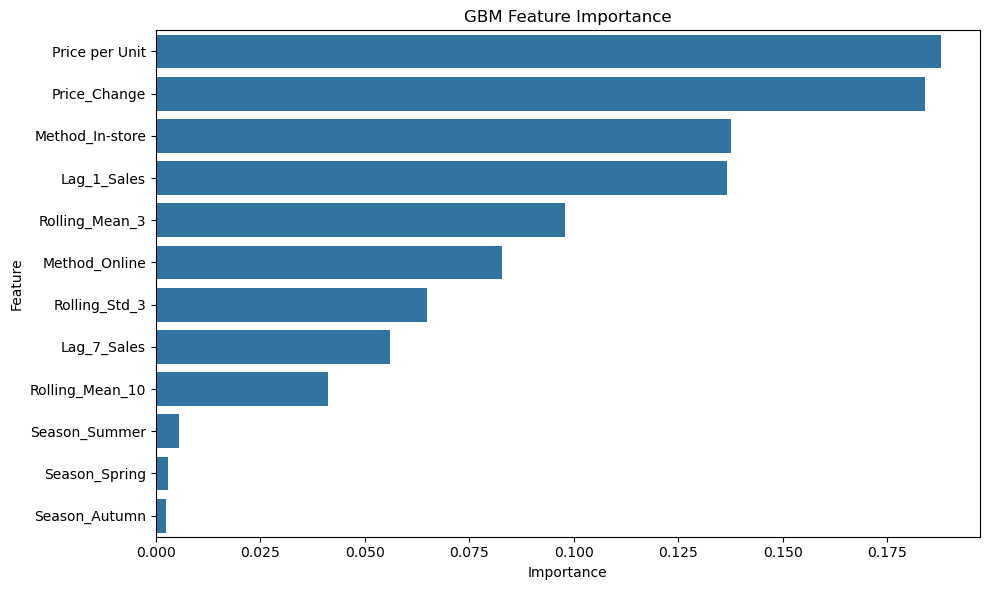

In [48]:
# Use the best estimator from your GBM tuning
gbm_importances = gbm_best.feature_importances_

# Create a DataFrame to organize features and their importance
gbm_fi_df = pd.DataFrame({
    'Feature': features,
    'Importance': gbm_importances
}).sort_values('Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=gbm_fi_df)
plt.title("GBM Feature Importance")
plt.tight_layout()
plt.show()